In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
import scipy.stats as ss
from statistics import stdev
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import statsmodels.stats.api as sm

In [18]:
wcd = pd.read_csv('Wholesale+Customers+Data.csv')

In [19]:
wcd.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
Total               0
dtype: int64

# 1.1.1 Use methods of descriptive statistics to summarize data

In [20]:
wcd.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


# 1.1.2 Which Region and which Channel spent the most?
# 1.1.3 Which Region and which Channel spent the least?

In [21]:
wcd_new = wcd.copy()
wcd_new['Total']= wcd_new["Fresh"] + wcd_new["Milk"] + wcd_new["Grocery"] + wcd_new["Frozen"] + wcd_new["Detergents_Paper"] + wcd_new["Delicatessen"]
wcd_new

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [22]:
wcd_new.groupby('Region') ['Total'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

In [23]:
wcd_new.groupby('Channel') ['Total'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

The Region which has spent the most is 'Other' with a total of approx 10.68 million followed by Lisbon at 2.39 million. Oporto was the least spending region with 1.56 million.  

Channel wise the most spending was done by the Hotel at 8 million making Retail channel the least spending with total of 6.62 million. 

# 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [24]:
wcd.groupby(["Region", "Channel"]).describe().T

Region                     Lisbon                       Oporto                 \
Channel                     Hotel         Retail         Hotel         Retail   
Buyer/Spender count     59.000000      18.000000      28.00000      19.000000   
              mean     237.728814     226.055556     321.00000     311.105263   
              std       21.411269      23.725073      12.26256      13.904015   
              min      197.000000     198.000000     295.00000     294.000000   
              25%      221.500000     208.500000     313.50000     301.500000   
...                           ...            ...           ...            ...   
Total         min     4925.000000   18342.000000    4129.00000   17598.000000   
              25%    15392.500000   33649.500000   16786.00000   29264.000000   
              50%    22287.000000   41989.000000   22134.50000   36446.000000   
              75%    30188.500000   52830.500000   28781.25000   50788.500000   
              max    73243.000000  107155.000000  130877.00000  120291.000000   

Region                       Other                 
Channel                      Hotel         Retail  
Buyer/Spender count     211.000000     105.000000  
              mean      227.582938     152.438095  
              std       139.651493     138.867530  
              min         4.000000       1.000000  
              25%       113.500000      46.000000  
...                            ...            ...  
Total         min       904.000000   14993.000000  
              25%     13485.000000   30091.000000  
              50%     19789.000000   37085.000000  
              75%     33593.500000   51064.000000  
              max    190169.000000  199891.000000  

[64 rows x 6 columns]

In [25]:
wcd_new.groupby(["Region","Channel"]).size()

Region  Channel
Lisbon  Hotel       59
        Retail      18
Oporto  Hotel       28
        Retail      19
Other   Hotel      211
        Retail     105
dtype: int64

In [26]:
wcd_new.groupby(['Region', 'Channel']) ['Total'].sum()

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total, dtype: int64

In [27]:
wcd_new.groupby(['Region', 'Channel']) ['Total'].mean()

Region  Channel
Lisbon  Hotel      26073.593220
        Retail     47137.277778
Oporto  Hotel      25683.928571
        Retail     43996.736842
Other   Hotel      27213.635071
        Retail     47004.971429
Name: Total, dtype: float64

In [28]:
wcd_new.groupby(['Region', 'Channel']) ['Total'].std()

Region  Channel
Lisbon  Hotel      16484.700897
        Retail     23646.468894
Oporto  Hotel      22572.594954
        Retail     22928.934726
Other   Hotel      23532.179828
        Retail     31365.497377
Name: Total, dtype: float64

array([[<AxesSubplot:title={'center':'Buyer/Spender'}>,
        <AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>,
        <AxesSubplot:title={'center':'Detergents_Paper'}>],
       [<AxesSubplot:title={'center':'Delicatessen'}>,
        <AxesSubplot:title={'center':'Total'}>, <AxesSubplot:>]],
      dtype=object)

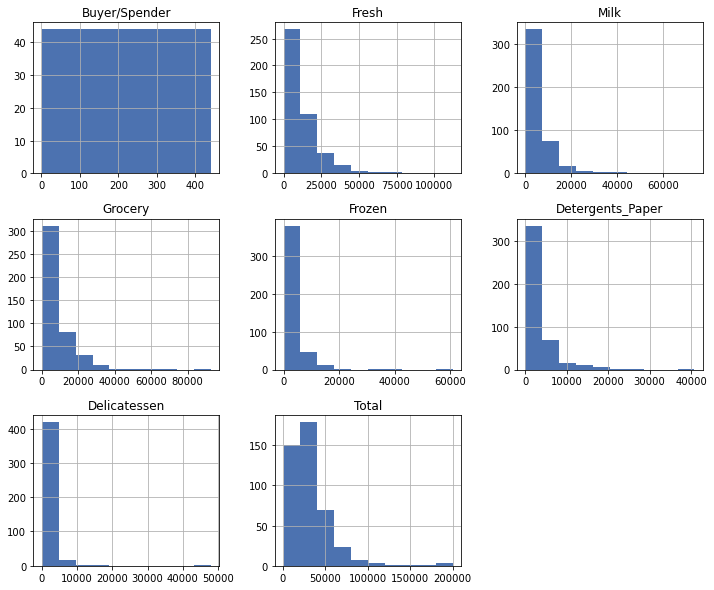

In [29]:
wcd.hist(figsize=(12,10))

In [30]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(wcd.Fresh),stats.skew(wcd.Milk),stats.skew(wcd.Grocery),stats.skew(wcd.Frozen),stats.skew(wcd.Detergents_Paper),stats.skew(wcd.Delicatessen)]},
                        index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']) 
Skewness

,Skewness
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534


All the variables are highly skewed

# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

We will calculate the Coefficient of variation (CV) for each of the 6 variables to help determine which variable is the most inconsistent and which variable is the most consistant. 

Each of the variable is segregated together based on the region and channel in which it is consumed. Then we will take the avg of region and channel wise segregated variable to determine a single parameter to compare each variable with each other. 

## CV for variable Fresh

In [31]:
print('CV for Fresh:', wcd.groupby(["Region", "Channel"]) ['Fresh'].std() / wcd.groupby(["Region", "Channel"]) ['Fresh'].mean()*100)

CV for Fresh: Region  Channel
Lisbon  Hotel       95.657772
        Retail     104.144644
Oporto  Hotel       76.986698
        Retail      94.213071
Other   Hotel      106.258233
        Retail      98.005284
Name: Fresh, dtype: float64


In [32]:
# Range of CV for variable Fresh
R_CV_Fresh = (106.258233 - 76.986698)
print ('Range of CV for variable Fresh is:',R_CV_Fresh)

Range of CV for variable Fresh is: 29.271535


## CV for variable Milk

In [33]:
print('CV for Milk:', wcd.groupby(["Region", "Channel"]) ['Milk'].std() / wcd.groupby(["Region", "Channel"]) ['Milk'].mean()*100)

CV for Milk: Region  Channel
Lisbon  Hotel      111.061894
        Retail      61.287291
Oporto  Hotel      128.832752
        Retail      71.934562
Other   Hotel      129.295377
        Retail      96.301047
Name: Milk, dtype: float64


In [34]:
# Range of CV for variable Milk
R_CV_Milk = (129.295377 - 61.287291)
print ('Range of CV for variable Milk is:',R_CV_Milk)

Range of CV for variable Milk is: 68.00808599999999


## CV for variable Grocery

In [35]:
print('CV for Grocery:', wcd.groupby(["Region", "Channel"]) ['Grocery'].std() / wcd.groupby(["Region", "Channel"]) ['Grocery'].mean()*100)

CV for Grocery: Region  Channel
Lisbon  Hotel      90.152059
        Retail     56.381113
Oporto  Hotel      69.350445
        Retail     85.968286
Other   Hotel      92.455658
        Retail     77.090900
Name: Grocery, dtype: float64


In [36]:
# Range of CV for variable Grocery
R_CV_Grocery = (92.455658 - 56.381113)
print ('Range of CV for variable Grocery is:',R_CV_Grocery)

Range of CV for variable Grocery is: 36.074545


## CV for variable Frozen

In [37]:
print('CV for Frozen:', wcd.groupby(["Region", "Channel"]) ['Frozen'].std() / wcd.groupby(["Region", "Channel"]) ['Frozen'].mean()*100)

CV for Frozen: Region  Channel
Lisbon  Hotel      104.768875
        Retail      93.833991
Oporto  Hotel      199.380458
        Retail     160.541365
Other   Hotel      135.540764
        Retail      99.424976
Name: Frozen, dtype: float64


In [38]:
# Range of CV for variable Frozen
R_CV_Frozen = (199.380458 - 93.833991)
print ('Range of CV for variable Frozen is:',R_CV_Frozen)

Range of CV for variable Frozen is: 105.546467


## CV for variable Detergents_Paper

In [39]:
print('CV for Detergents_Paper:', wcd.groupby(["Region", "Channel"]) ['Detergents_Paper'].std() / wcd.groupby(["Region", "Channel"]) ['Detergents_Paper'].mean()*100)

CV for Detergents_Paper: Region  Channel
Lisbon  Hotel      137.387973
        Retail      67.060091
Oporto  Hotel       88.108125
        Retail      98.531379
Other   Hotel      139.823968
        Retail      87.286321
Name: Detergents_Paper, dtype: float64


In [40]:
# Range of CV for variable Detergents_Paper
R_CV_Detergents_Paper = (139.823968 - 67.060091)
print ('Range of CV for variable Detergents_Paper is:',R_CV_Detergents_Paper)

Range of CV for variable Detergents_Paper is: 72.76387700000001


## CV for variable Delicatessen

In [41]:
print('CV for Delicatessen:', wcd.groupby(["Region", "Channel"]) ['Delicatessen'].std() / wcd.groupby(["Region", "Channel"]) ['Delicatessen'].mean()*100)

CV for Delicatessen: Region  Channel
Lisbon  Hotel      101.903915
        Retail      86.887550
Oporto  Hotel       95.558877
        Retail      85.991771
Other   Hotel      241.271227
        Retail     116.035548
Name: Delicatessen, dtype: float64


In [42]:
# Range of CV for variable Delicatessen
R_CV_Delicatessen = (241.271227 - 85.991771)
print ('Range of CV for variable Delicatessen is:',R_CV_Delicatessen)

Range of CV for variable Delicatessen is: 155.279456


From the above results of range of CV for each variable, we can see that the range of dispersion is maximum with Delicatessen (155.28). Also, the range of dispersion observed with Fresh is minimum (29.27)

Hence, Delicatesse is the most inconsistent variable whereas Fresh is the least inconsistent variable of all.

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

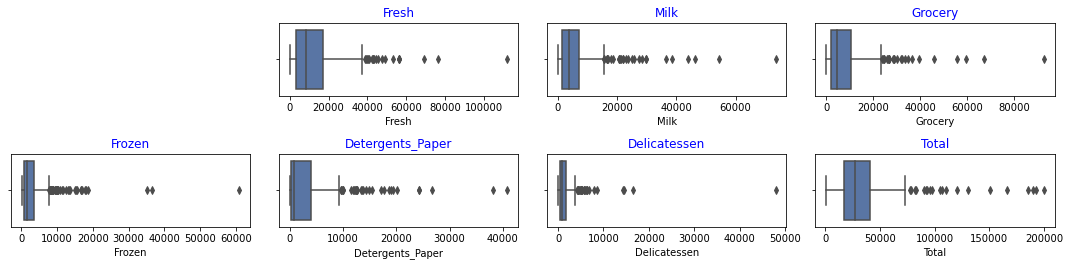

In [43]:
data_plot=wcd[wcd.dtypes[wcd.dtypes!='object'].index]
fig=plt.figure(figsize=(15,7))
for i in range(1,len(data_plot.columns)):
   ax=fig.add_subplot(4,4,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

The earnings coming from all channels and regions are dispersed. Even though they are positively sckewed as can be seen from the boxplot images, it is important that the level of dispersion is significantly reduced. In order to achieve this the range of cost or gap between the min revenue and max revenue has to reduce significantly. 

In order to obtain the above objective, it can be suggested that should first increase more production of the variables and no of channels distributing the variables at the main regions of Lisbon and Oporta to boost more spending. Oporto which has the least amount of channels (37) still generates good amount of revenue compared to the other two regions. Increasing the no of channels here can significantly increase revenue. 

Once production is increased at major revenue generating channels, the lesser revenue generating channels should be simultaneously closed or could be used for supplying high revenue generating variables of their region to other regions.